In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from IPython.display import display
from gensim.corpora import Dictionary
from gensim.models import ldamodel

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Data (working with master corpus)

In [129]:
df = pd.read_csv('..\master_corpus.csv')

c:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [152]:
corpus_list_master = ([list(x) for x in df.fillna('').values])

In [ ]:
corpus_list_master

In [ ]:
dictionary = Dictionary(corpus_list_master)
corpus = [dictionary.doc2bow(text) for text in corpus_list_master]

import numpy
numpy.random.seed(1) # setting random seed to get the same results each time.

from gensim.models import ldamodel
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, minimum_probability=1e-8)

In [ ]:
model.show_topics()

In [160]:
topic1, topic2, topic3, topic4, topic5, topic6, topic7, topic8, topic9, topic10 = model.show_topics()

##### How similar are our topics from our model

In [161]:
def parse_topic_string(topic):
    # takes the string returned by model.show_topics()
    # split on strings to get topics and the probabilities
    topic = topic.split('+')
    # list to store topic bows
    topic_bow = []
    for word in topic:
        # split probability and word
        prob, word = word.split('*')
        # get rid of spaces and quote marks
        word = word.replace(" ","").replace('"', '')
        # convert to word_type
        word = model.id2word.doc2bow([word])[0][0]
        topic_bow.append((word, float(prob)))
    return topic_bow

In [166]:
topic1_distribution = parse_topic_string(topic1[1])
topic2_distribution = parse_topic_string(topic2[1])
topic3_distribution = parse_topic_string(topic3[1])
topic4_distribution = parse_topic_string(topic4[1])
topic5_distribution = parse_topic_string(topic5[1])
topic6_distribution = parse_topic_string(topic6[1])
topic7_distribution = parse_topic_string(topic7[1])
topic8_distribution = parse_topic_string(topic8[1])
topic9_distribution = parse_topic_string(topic9[1])
topic10_distribution = parse_topic_string(topic10[1])

In [167]:
topic_dist_list = [topic1_distribution, topic2_distribution, topic3_distribution, topic4_distribution, topic5_distribution, topic6_distribution, topic7_distribution, topic8_distribution, topic9_distribution, topic10_distribution]

In [168]:
hellinger_topic_dist_scores = []

for i in range(len(topic_dist_list) - 1):
    mark = i + 1
    if not (mark <= len(topic_dist_list)):
        break
    else:
        score = hellinger(topic_dist_list[i], topic_dist_list[mark])
        hellinger_topic_dist_scores.append(score)

In [169]:
print(hellinger_topic_dist_scores)

[0.8769264507357502, 0.6387487769068525, 0.6992853494818835, 0.976473245921259, 0.6815423684555495, 0.0, 0.0, 0.5911852501542981, 0.8276472678623424]


#### Calculating distance metrics between documents

In [ ]:
path = '..\prob_dist (no_duplicates)\corpus_docs'
csv_files = glob.glob(path + "\*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

dataframes_list = []
for file in range(len(csv_files)):
    temp_df = pd.read_csv(csv_files[file])
    dataframes_list.append(temp_df)
    
corpus_list = []
for df in dataframes_list:
     corpus_list.append([list(x) for x in df.fillna('').values])
     
corpus_list[0]

In [171]:
corpus36, corpus37, corpus38, corpus39, corpus40, corpus41, corpus42, corpus43, corpus44, corpus45, corpus46, corpus47, corpus48, corpus49, corpus50, corpus51 = corpus_list[:]

In [172]:
doc_36 = corpus36[6]
doc_37 = corpus37[3]
doc_38 = corpus38[10]
doc_39 = corpus39[6]
doc_40 = corpus40[0]
doc_41 = corpus41[0]
doc_42 = corpus42[6]
doc_43 = corpus43[10]
doc_44 = corpus44[1]
doc_45 = corpus45[6]
doc_46 = corpus46[4]
doc_47 = corpus47[1]
doc_48 = corpus48[1]
doc_49 = corpus49[2]
doc_50 = corpus50[2]
doc_51 = corpus51[2]


# now let's make these into a bag of words format
bow_36 = model.id2word.doc2bow(doc_36)   
bow_37 = model.id2word.doc2bow(doc_37)   
bow_38 = model.id2word.doc2bow(doc_38)
bow_39 = model.id2word.doc2bow(doc_39)   
bow_40 = model.id2word.doc2bow(doc_40)   
bow_41 = model.id2word.doc2bow(doc_41)
bow_42 = model.id2word.doc2bow(doc_42)

bow_43 = model.id2word.doc2bow(doc_43)   
bow_44 = model.id2word.doc2bow(doc_44)   
bow_45 = model.id2word.doc2bow(doc_45)
bow_46 = model.id2word.doc2bow(doc_46)   
bow_47 = model.id2word.doc2bow(doc_47)   
bow_48 = model.id2word.doc2bow(doc_48)
bow_49 = model.id2word.doc2bow(doc_49)   

bow_50 = model.id2word.doc2bow(doc_50)
bow_51 = model.id2word.doc2bow(doc_51)

# we can now get the LDA topic distributions for these
lda_bow_36 = model[bow_36]
lda_bow_37 = model[bow_37]
lda_bow_38 = model[bow_38]
lda_bow_39 = model[bow_39]
lda_bow_40 = model[bow_40]
lda_bow_41 = model[bow_41]
lda_bow_42 = model[bow_42]

lda_bow_43 = model[bow_43]
lda_bow_44 = model[bow_44]
lda_bow_45 = model[bow_45]
lda_bow_46 = model[bow_46]
lda_bow_47 = model[bow_47]
lda_bow_48 = model[bow_48]
lda_bow_49 = model[bow_49]

lda_bow_50 = model[bow_50]
lda_bow_51 = model[bow_51]

lda_bows = [lda_bow_36, lda_bow_37, lda_bow_38,  lda_bow_39, lda_bow_40, lda_bow_41, lda_bow_42, lda_bow_43, lda_bow_44, lda_bow_45, lda_bow_46, lda_bow_47, lda_bow_48, lda_bow_49, lda_bow_50, lda_bow_51]


In [173]:
from gensim.matutils import hellinger

hellinger_master_scores = []

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = hellinger(lda_bows[i], lda_bows[mark])
        hellinger_master_scores.append(score)

In [174]:
print(hellinger_master_scores)

[0.674886968058589, 0.3248230255363005, 0.4244080972824832, 0.4309400471522973, 0.3094425904398945, 0.34110448209037086, 0.32448572413227356, 0.39848736638862425, 0.33532650170495437, 0.23058983291246718, 0.4286170442218547, 0.29529020305369, 0.2689965800736421, 0.3791815660441394, 0.31355814030827195]


In [181]:
# weeks = ["36-37", "37-38", "38-39", "39-40", "40-41", "41-42", "42-43", "43-44", "44-45", "45-46", "46-47", "47-48", "48-49", "49-50", "50-51"]
weeks = ["36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50"]

c:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
2022-05-11 08:25:42,116 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-05-11 08:25:42,123 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


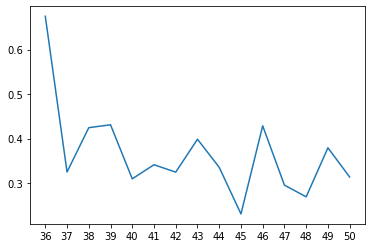

In [183]:
# Plot with Seaborn

x = weeks
y = hellinger_master_scores

sns.lineplot(x, y)
plt.show()

#### Jensen Shannon Scores

In [202]:
from gensim.matutils import kullback_leibler
import math

P = [0.36, 0.48, 0.16]
Q = [0.30, 0.50, 0.20]

def js_score(p, q):
    # find m & z
    m = [round(x + y, 2) for x, y in zip(p, q)]
    z = [round(1/2 * i, 2) for i in m]
    # find the kullback distance between p-z & q-z
    kl_pz = round(kullback_leibler(p, z), 6)
    kl_qz = round(kullback_leibler(q, z), 6)
    # compute js_score
    js_score = math.sqrt((kl_pz + kl_qz) / 2)
    return js_score

# print(kullback_leibler(lda_bow_36, lda_bow_37))
# print(kullback_leibler(lda_bow_37, lda_bow_36))

print(js_score(P, Q))

0.05080354318352215


#### Data (working with sub_corpus)

In [ ]:
path = '..\prob_dist (no_duplicates)\corpus_docs'
csv_files = glob.glob(path + "\*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

dataframes_list = []
for file in range(len(csv_files)):
    temp_df = pd.read_csv(csv_files[file])
    dataframes_list.append(temp_df)
    
corpus_list = []
for df in dataframes_list:
     corpus_list.append([list(x) for x in df.fillna('').values])
     
corpus_list[0]

In [66]:
corpus36, corpus37, corpus38, corpus39, corpus40, corpus41, corpus42, corpus43, corpus44, corpus45, corpus46, corpus47, corpus48, corpus49, corpus50, corpus51 = corpus_list[:]

In [71]:
# print(corpus36)

#### Build model with test corpus

In [ ]:
dictionary = Dictionary(corpus36)

corpus = [dictionary.doc2bow(text) for text in corpus36]

np.random.seed(1) # setting random seed to get the same results each time.

from gensim.models import ldamodel
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=4, minimum_probability=1e-8)
model.show_topics()

In [87]:
doc_36 = corpus36[6]
doc_37 = corpus37[3]
doc_38 = corpus38[10]
doc_39 = corpus39[6]
doc_40 = corpus40[0]
doc_41 = corpus41[0]
doc_42 = corpus42[6]
doc_43 = corpus43[10]
doc_44 = corpus44[1]
doc_45 = corpus45[6]
doc_46 = corpus46[4]
doc_47 = corpus47[1]
doc_48 = corpus48[1]
doc_49 = corpus49[2]
doc_50 = corpus50[2]
doc_51 = corpus51[2]


# now let's make these into a bag of words format
bow_36 = model.id2word.doc2bow(doc_36)   
bow_37 = model.id2word.doc2bow(doc_37)   
bow_38 = model.id2word.doc2bow(doc_38)
bow_39 = model.id2word.doc2bow(doc_39)   
bow_40 = model.id2word.doc2bow(doc_40)   
bow_41 = model.id2word.doc2bow(doc_41)
bow_42 = model.id2word.doc2bow(doc_42)

bow_43 = model.id2word.doc2bow(doc_43)   
bow_44 = model.id2word.doc2bow(doc_44)   
bow_45 = model.id2word.doc2bow(doc_45)
bow_46 = model.id2word.doc2bow(doc_46)   
bow_47 = model.id2word.doc2bow(doc_47)   
bow_48 = model.id2word.doc2bow(doc_48)
bow_49 = model.id2word.doc2bow(doc_49)   

bow_50 = model.id2word.doc2bow(doc_50)
bow_51 = model.id2word.doc2bow(doc_51)

# we can now get the LDA topic distributions for these
lda_bow_36 = model[bow_36]
lda_bow_37 = model[bow_37]
lda_bow_38 = model[bow_38]
lda_bow_39 = model[bow_39]
lda_bow_40 = model[bow_40]
lda_bow_41 = model[bow_41]
lda_bow_42 = model[bow_42]

lda_bow_43 = model[bow_43]
lda_bow_44 = model[bow_44]
lda_bow_45 = model[bow_45]
lda_bow_46 = model[bow_46]
lda_bow_47 = model[bow_47]
lda_bow_48 = model[bow_48]
lda_bow_49 = model[bow_49]

lda_bow_50 = model[bow_50]
lda_bow_51 = model[bow_51]

lda_bows = [lda_bow_36, lda_bow_37, lda_bow_38,  lda_bow_39, lda_bow_40, lda_bow_41, lda_bow_42, lda_bow_43, lda_bow_44, lda_bow_45, lda_bow_46, lda_bow_47, lda_bow_48, lda_bow_49, lda_bow_50, lda_bow_51]


#### Hellinger Scores

In [115]:
from gensim.matutils import hellinger

hellinger_scores = []

for i in range(len(lda_bows) - 1):
    mark = i + 1
    if not (mark <= len(lda_bows)):
        break
    else:
        score = hellinger(lda_bows[i], lda_bows[mark])
        hellinger_scores.append(score)


In [127]:
print(hellinger_scores)

[0.861059457666652, 0.17100518611724236, 0.009206210107935828, 0.15104428321619856, 0.012639754685429818, 0.012286967258340095, 0.15498063783269542, 0.1630842275184269, 0.024414554344562724, 0.16613962847955102, 0.1572626110690492, 0.12097366202482758, 0.1204732272897797, 0.24731762661219558, 0.019706270164351437]


In [126]:
# weeks = ["36-37", "37-38", "38-39", "39-40", "40-41", "41-42", "42-43", "43-44", "44-45", "45-46", "46-47", "47-48", "48-49", "49-50", "50-51"]
weeks = ["36", "37", "38", "39", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "50"]

2022-05-11 00:15:19,186 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-05-11 00:15:19,190 : INFO : Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


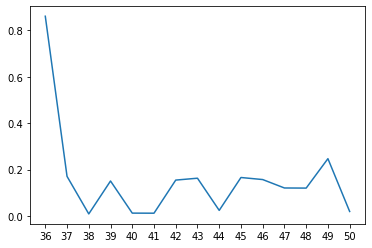

<Figure size 216x216 with 0 Axes>

In [125]:
plt.plot(weeks, hellinger_scores)
plt.figure(figsize=(3, 3))
plt.show()